In [65]:
import pandas as pd

In [114]:
filePath = 'volumes_acude_gaviao.csv'
df1_gaviao = pd.read_csv(filePath)
del df1_gaviao["Açude"]
df1_gaviao["Data do registro"] = pd.to_datetime(df1_gaviao["Data do registro"], format="%d/%m/%Y")
df1_gaviao['Volume (%)'] = df1_gaviao['Volume (%)'].apply(lambda x : float ( x.replace(',','.') ) )
display(dfAcude)

,Data do registro,Volume (%),Volume (m³),Afluência/Defluência (m²)
0,2012-04-26,81.79,1.186.624,0
1,2012-05-30,82.00,"1.189.708,80",0
2,2012-06-01,81.79,1.186.624,0
3,2012-07-01,78.60,1.140.352,0
4,2012-08-31,74.63,1.082.730,0
...,...,...,...,...
90,2021-11-30,34.72,"503.723,40","-1.780,40"
91,2021-12-31,31.96,"463.664,40","-1.780,40"
92,2022-01-31,29.83,"432.829,60",0
93,2022-02-28,27.34,"396.667,60","-803,60"


In [115]:
df2_gaviao = df1_gaviao.set_index(pd.DatetimeIndex(df1_gaviao['Data do registro']))
del df2_gaviao['Data do registro']
display(df2_gaviao)

,Volume (%),Volume (m³),Afluência/Defluência (m²)
Data do registro,,,
2012-04-26,81.79,1.186.624,0
2012-05-30,82.00,"1.189.708,80",0
2012-06-01,81.79,1.186.624,0
2012-07-01,78.60,1.140.352,0
2012-08-31,74.63,1.082.730,0
...,...,...,...
2021-11-30,34.72,"503.723,40","-1.780,40"
2021-12-31,31.96,"463.664,40","-1.780,40"
2022-01-31,29.83,"432.829,60",0


In [73]:
# dfAcude_dateIndex.describe()

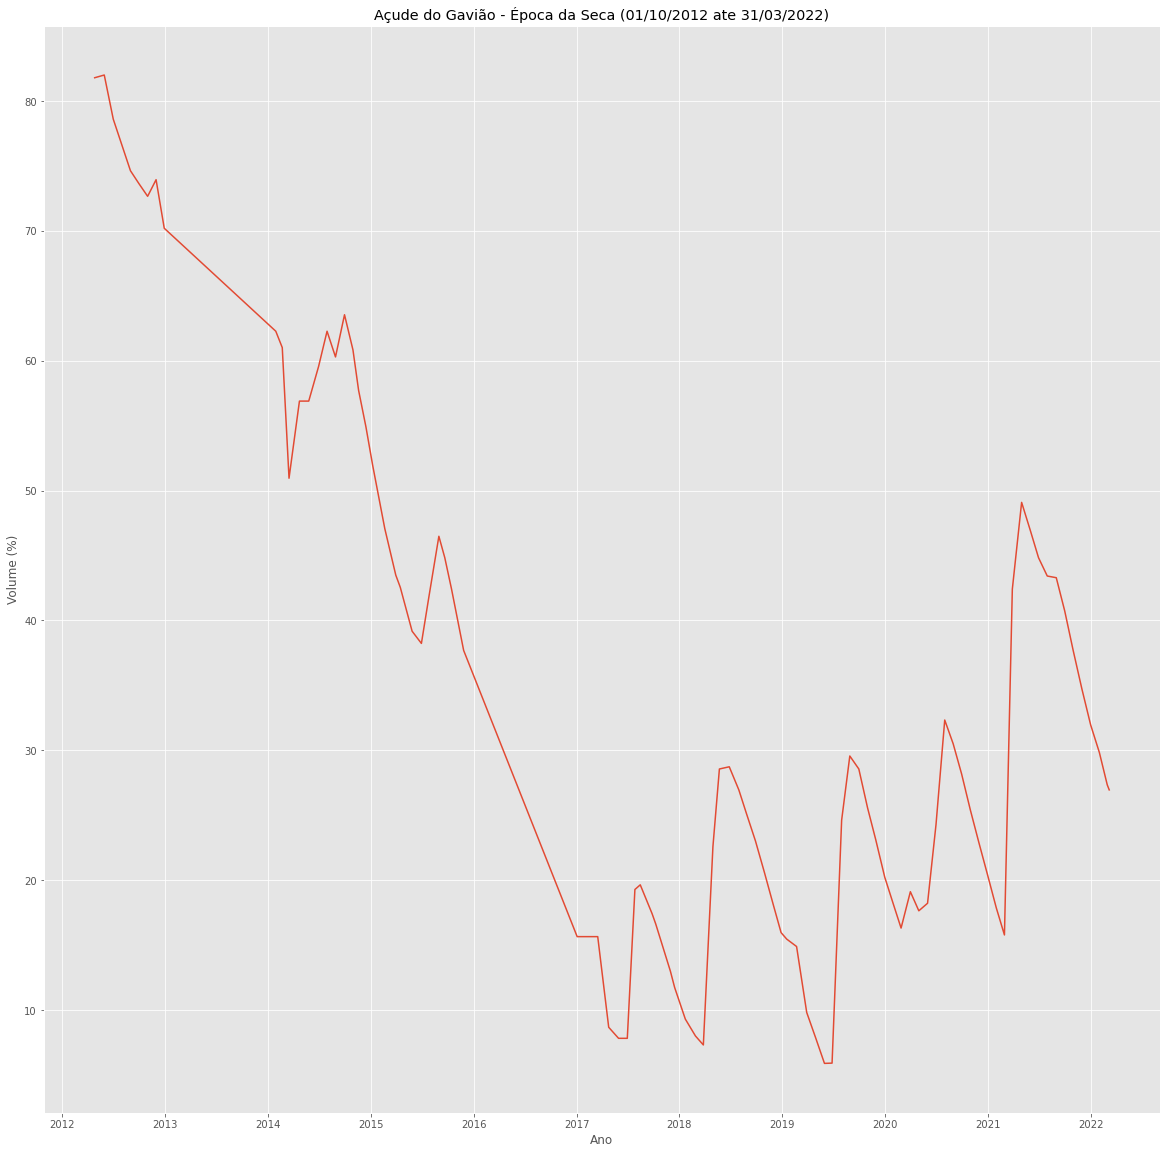

In [161]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(20, 20))
plt.plot(df2_gaviao["Volume (%)"])

plt.title("Açude do Gavião - Época da Seca (01/10/2012 ate 31/03/2022)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.savefig("acude_gaviao-seca.pdf")
plt.show()

In [122]:
print(list(range(1,10)))
print(len(df2_gaviao))
df2_gaviao.head()

[1, 2, 3, 4, 5, 6, 7, 8, 9]
95


,Volume (%),Volume (m³),Afluência/Defluência (m²)
Data do registro,,,
2012-04-26,81.79,1.186.624,0
2012-05-30,82.00,"1.189.708,80",0
2012-06-01,81.79,1.186.624,0
2012-07-01,78.60,1.140.352,0
2012-08-31,74.63,1.082.730,0


In [124]:
# criar uma coluna com os dias
df3_gaviao = df2_gaviao
numero_de_medicoes = len(df3_gaviao)
df3_gaviao["mes"] = range(1,numero_de_medicoes+1)
df3_gaviao.head()

,Volume (%),Volume (m³),Afluência/Defluência (m²),mes
Data do registro,,,,
2012-04-26,81.79,1.186.624,0,1
2012-05-30,82.00,"1.189.708,80",0,2
2012-06-01,81.79,1.186.624,0,3
2012-07-01,78.60,1.140.352,0,4
2012-08-31,74.63,1.082.730,0,5


In [126]:
print(len(df3_gaviao)) # numero de tuplas ou linhas ou medições
df3_gaviao.tail()

95


,Volume (%),Volume (m³),Afluência/Defluência (m²),mes
Data do registro,,,,
2021-11-30,34.72,"503.723,40","-1.780,40",91
2021-12-31,31.96,"463.664,40","-1.780,40",92
2022-01-31,29.83,"432.829,60",0,93
2022-02-28,27.34,"396.667,60","-803,60",94
2022-03-07,26.95,"391.042,40","-803,60",95


In [128]:
import warnings
warnings.filterwarnings('ignore')

import numpy, pandas as pd
import sklearn.linear_model as lm


olm = lm.LinearRegression()

X = df3_gaviao['mes'].values.reshape(-1, 1)
y = df3_gaviao["Volume (%)"].values

In [95]:
# Previsao com o modelo - Método Predict
import numpy as np

x1 = np.array(x1).reshape(-1, 1)
x1

array([[112]])

In [129]:
X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [130]:
y[:5]

array([81.79, 82.  , 81.79, 78.6 , 74.63])

In [132]:
olm.fit(X, y) # HIPERPARAMETROS -  epochs=100, learning_rate=0.001, momentum=0.8, optimizer='SGD') HIPERPARAMETROS
olm

LinearRegression()

In [133]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = -0.44455081187010104 * x + 56.001281075028004


In [134]:
import numpy as np

X_media = np.mean(X)
y_media = np.mean(y)
X_media, y_media

(48.0, 34.66284210526315)

In [135]:
n = len(X)
n

95

In [104]:
numero_de_meses_medicao = len(X)
numero_de_meses_medicao

95

In [136]:
print(list(range(n)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]


In [106]:
numero_de_meses_medicao.shape

(1, 1)

In [137]:
numerador = 0
denominador = 0
for i in range(n):
    numerador = numerador + (X[i] - X_media) * (y[i] - y_media)
    denominador = denominador + (X[i] - X_media) ** 2

b1 = numerador / denominador
b1[0]

-0.4445508118701011

In [138]:
b0 = y_media - b1[0]  * X_media
b0

56.001281075028004

In [139]:
print(' y_prev_algebrico = {0}  {1} * x'.format(b0, b1[0]))

print(' y_prev = {0}  {1} * x'.format(b, a))

 y_prev_algebrico = 56.001281075028004  -0.4445508118701011 * x
 y_prev = 56.001281075028004  -0.44455081187010104 * x


In [140]:
df3_gaviao.tail()

,Volume (%),Volume (m³),Afluência/Defluência (m²),mes
Data do registro,,,,
2021-11-30,34.72,"503.723,40","-1.780,40",91
2021-12-31,31.96,"463.664,40","-1.780,40",92
2022-01-31,29.83,"432.829,60",0,93
2022-02-28,27.34,"396.667,60","-803,60",94
2022-03-07,26.95,"391.042,40","-803,60",95


In [141]:
x1 = 112
y_prev = b1[0] * x1 + b0
y_prev

6.211590145576679

In [142]:
# Previsao com o modelo - Método Predict
import numpy as np

x1 = np.array(x1).reshape(-1, 1)
x1

array([[112]])

In [143]:
olm.predict(x1)[0]

6.211590145576686

In [144]:
x2 = 113
y_prev = b1[0] * x2 + b0
y_prev

5.7670393337065775

In [145]:
# Previsao com o modelo - Método Predict
x2 = np.array(x2).reshape(-1, 1)
olm.predict(x2)[0]

5.767039333706585

Equação: y = -0.44455081187010104 * x + 56.001281075028004


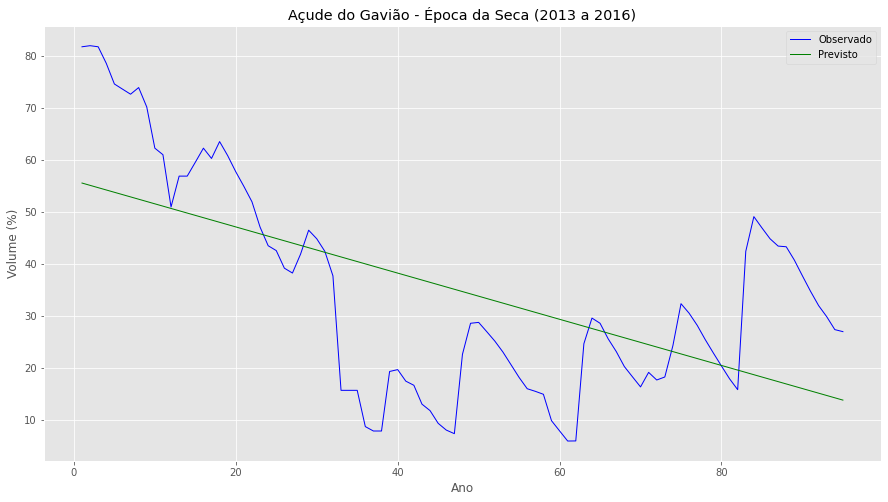

In [160]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,8))

# Plot both data sets
#plt.scatter(X_test, Y_test,  color='black')
plt.plot(X, y, color='blue',
         linewidth=1) # Dados Observados

plt.plot(X, olm.predict(X), color='green',
         linewidth=1) # Dados Previstos

# Add decorations
plt.title("Açude do Gavião - Época da Seca (2013 a 2016)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Observado", "Previsto",], loc="upper right")

print('Equação: y = {0} * x + {1}'.format(a, b))
plt.savefig("acude_gaviao_olm-seca.pdf")
plt.show()

In [147]:
# Predict values
from sklearn.metrics import r2_score

y_pred = olm.predict(df3_gaviao['mes'].values.reshape(-1,1))

df3_gaviao['Volume_previsto'] = y_pred

df3_gaviao.head()

,Volume (%),Volume (m³),Afluência/Defluência (m²),mes,Volume_previsto
Data do registro,,,,,
2012-04-26,81.79,1.186.624,0,1,55.556730
2012-05-30,82.00,"1.189.708,80",0,2,55.112179
2012-06-01,81.79,1.186.624,0,3,54.667629
2012-07-01,78.60,1.140.352,0,4,54.223078
2012-08-31,74.63,1.082.730,0,5,53.778527


In [148]:
# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.34654462511181594


In [149]:
numero_de_meses_medicao = len(X)
numero_de_meses_medicao

95

In [150]:
import numpy as np
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
numero_de_meses_medicao

array([[95]])

In [151]:
numero_de_meses_medicao.shape

(1, 1)

In [152]:
# predicao para 30 dias - 1 mes de medicao
#numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+1)[0]
print ("Volume do Gavião depois de um mes = %6.2f %%" % (pred))

Volume do Gavião depois de um mes =  13.32 %


In [153]:
# predicao para 60 dias - 2 meses
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+2)[0]
print ("Volume Boqueirão depois de 2 meses = %6.2f %%" % (pred))

Volume Boqueirão depois de 2 meses =  12.88 %


In [154]:
df3.head()

,Volume (%),Volume (m³),Afluência/Defluência (m²),mes,Volume_previsto
Data do registro,,,,,
2012-04-26,81.79,1.186.624,0,1,55.556730
2012-05-30,82.00,"1.189.708,80",0,2,55.112179
2012-06-01,81.79,1.186.624,0,3,54.667629
2012-07-01,78.60,1.140.352,0,4,54.223078
2012-08-31,74.63,1.082.730,0,5,53.778527


In [155]:
df3.tail()

,Volume (%),Volume (m³),Afluência/Defluência (m²),mes,Volume_previsto
Data do registro,,,,,
2021-11-30,34.72,"503.723,40","-1.780,40",91,15.547157
2021-12-31,31.96,"463.664,40","-1.780,40",92,15.102606
2022-01-31,29.83,"432.829,60",0,93,14.658056
2022-02-28,27.34,"396.667,60","-803,60",94,14.213505
2022-03-07,26.95,"391.042,40","-803,60",95,13.768954


In [156]:
numero_de_meses_medicao

array([[95]])

In [159]:
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)

print("Última observação: 31 de Março de 2017: 3.18% - Volume")
print("Erro de Previsão (mês de Março) : Previsto - Observado = ", \
      "{:.2f}".format(olm.predict(numero_de_meses_medicao)[0] - 3.18) )

print ("\nPrevisão do Volume do Açude do Gavião até Secar - Ano 2017")
meses = 0
nome_meses = [ "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro", "Janeiro", "Fevereiro"]
while (True):
    pred = olm.predict(numero_de_meses_medicao+meses)[0]
    if pred < 0: # Secar o açude
        break
    if pred > 100: # Encher o açude
        break
    print ("Volume Açude do Gavião - Mês de %s -> %-5.2f%%" % (nome_meses[meses],pred))
    meses = meses + 1
   # print(meses)
pred = olm.predict(numero_de_meses_medicao+meses)[0]
print ("Volume Açude do Gavião - Mês de %s  -> %-5.2f%%" % (nome_meses[meses],pred))

Última observação: 31 de Março de 2017: 3.18% - Volume
Erro de Previsão (mês de Março) : Previsto - Observado =  10.59

Previsão do Volume do Açude do Gavião até Secar - Ano 2017
Volume Açude do Gavião - Mês de Abril -> 13.77%
Volume Açude do Gavião - Mês de Maio -> 13.32%
Volume Açude do Gavião - Mês de Junho -> 12.88%
Volume Açude do Gavião - Mês de Julho -> 12.44%
Volume Açude do Gavião - Mês de Agosto -> 11.99%
Volume Açude do Gavião - Mês de Setembro -> 11.55%
Volume Açude do Gavião - Mês de Outubro -> 11.10%
Volume Açude do Gavião - Mês de Novembro -> 10.66%
Volume Açude do Gavião - Mês de Dezembro -> 10.21%
Volume Açude do Gavião - Mês de Janeiro -> 9.77 %
Volume Açude do Gavião - Mês de Fevereiro -> 9.32 %


IndexError: list index out of range